In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data into DataFrame.
data = pd.read_csv('insurance.csv')
print(data.shape)

(1338, 7)


In [3]:
print(data)

       Age  Gender   BMI  Children Smoker     Region  Expenses
0     19.0  female  27.9         0    yes  southwest  16884.92
1     18.0    male  33.8         1     no  southeast   1725.55
2     28.0    male  33.0         3     no  southeast   4449.46
3     33.0    male  22.7         0     no  northwest  21984.47
4     32.0    male  28.9         0     no  northwest   3866.86
...    ...     ...   ...       ...    ...        ...       ...
1333  50.0    male  31.0         3     no  northwest  10600.55
1334  18.0     NaN  31.9         0     no  northeast   2205.98
1335  18.0  female   NaN         0     no  southeast   1629.83
1336  21.0  female  25.8         0     no  southwest   2007.95
1337  61.0  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [4]:
#Getting the data's information about types and count.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1334 non-null   float64
 1   Gender    1329 non-null   object 
 2   BMI       1330 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1336 non-null   object 
 6   Expenses  1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None


In [5]:
#Describing the Statistical for the Data.
print(data.describe())

               Age          BMI     Children      Expenses
count  1334.000000  1330.000000  1338.000000   1337.000000
mean     39.176912    30.676917     1.136024  13273.306111
std      14.041367     6.094868     3.194662  12114.083012
min      18.000000    16.000000   -65.000000   1121.870000
25%      26.250000    26.300000     0.000000   4738.270000
50%      39.000000    30.400000     1.000000   9377.900000
75%      51.000000    34.700000     2.000000  16657.720000
max      64.000000    53.100000    70.000000  63770.430000


In [6]:
#Drop the Null values rows from the given table.
dataframe = data.dropna()
print(dataframe.describe())
print(dataframe.info())

               Age          BMI     Children      Expenses
count  1315.000000  1315.000000  1315.000000   1315.000000
mean     39.209886    30.666768     1.132319  13319.014616
std      14.055718     6.098831     3.217978  12130.978809
min      18.000000    16.000000   -65.000000   1121.870000
25%      26.500000    26.300000     0.000000   4729.005000
50%      39.000000    30.300000     1.000000   9391.350000
75%      51.000000    34.650000     2.000000  16964.130000
max      64.000000    53.100000    70.000000  63770.430000
<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1315 non-null   float64
 1   Gender    1315 non-null   object 
 2   BMI       1315 non-null   float64
 3   Children  1315 non-null   int64  
 4   Smoker    1315 non-null   object 
 5   Region    1315 non-null   object 
 6   Expenses  1315 non-null   float64
dtypes: float64(3

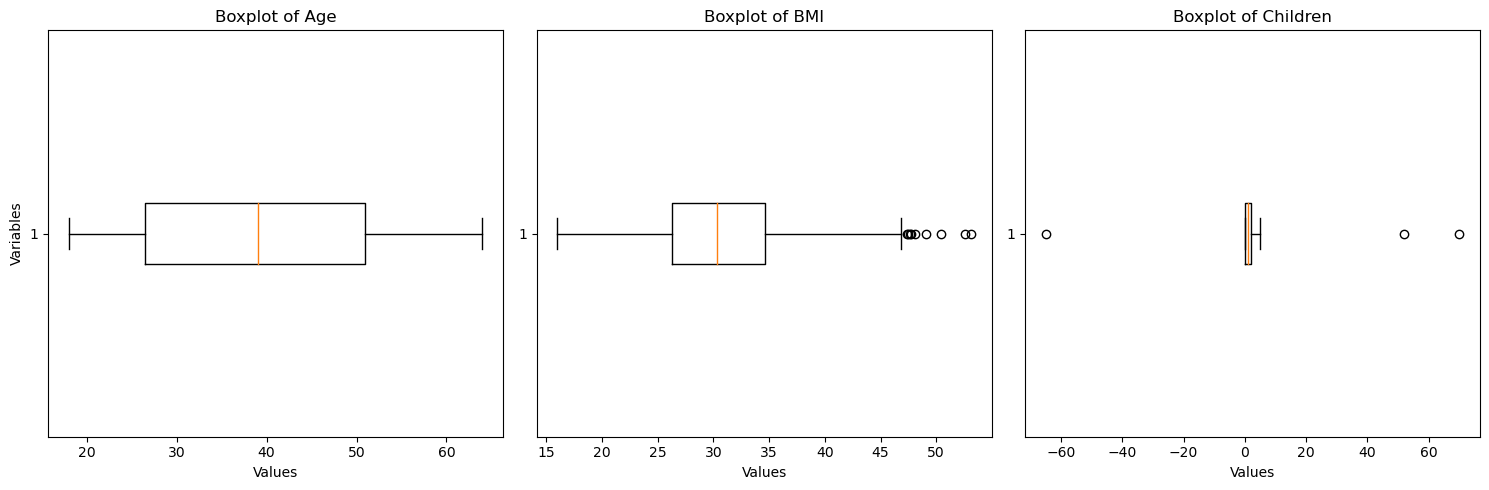

In [7]:
# Outlier Detection and Removal.
# Use boxplots to identify outliers in continuous columns (Age, BMI, Children, Expenses).

# Select columns for boxplot
columns_for_boxplot = ['Age', 'BMI', 'Children']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_for_boxplot), figsize=(15, 5))

# Iterate through columns and create boxplot for each
for i, column in enumerate(columns_for_boxplot):
    axes[i].boxplot(dataframe[column].values, vert=False)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('Values')

# Set common ylabel
axes[0].set_ylabel('Variables')

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
from scipy import stats

z_scores = stats.zscore(dataframe[columns_for_boxplot])
df_no_outliers = dataframe[(abs(z_scores) < 3).all(axis=1)]

In [9]:
#Handling Missing Values:
#Count missing values in each column.
missing_values = data.isnull().sum()
print(missing_values)

#Apply appropriate strategies to handle missing data (removal or imputation).Explain your decision for each column
dataframe = data.dropna()
print(dataframe.info())#Above line removed the null values present in the data.

Age         4
Gender      9
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1315 non-null   float64
 1   Gender    1315 non-null   object 
 2   BMI       1315 non-null   float64
 3   Children  1315 non-null   int64  
 4   Smoker    1315 non-null   object 
 5   Region    1315 non-null   object 
 6   Expenses  1315 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 82.2+ KB
None


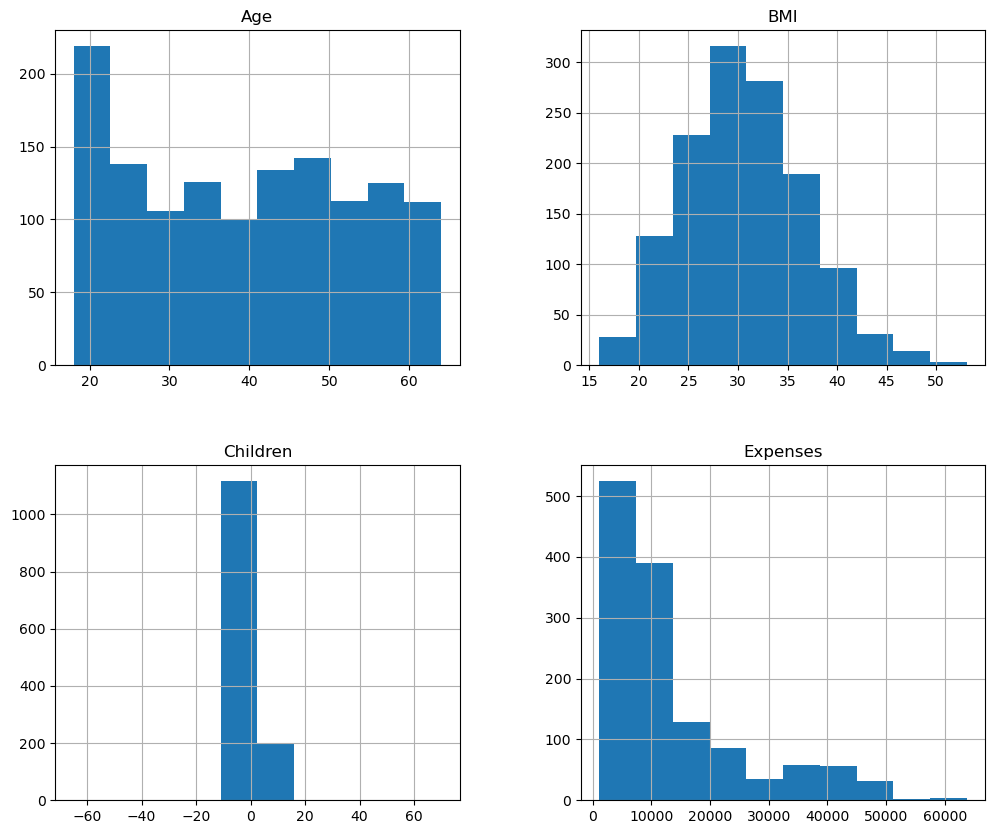

In [10]:
#Data Distribution Visualization.

#Plot histograms for each numerical column.
dataframe.hist(figsize=(12,10))
plt.show()

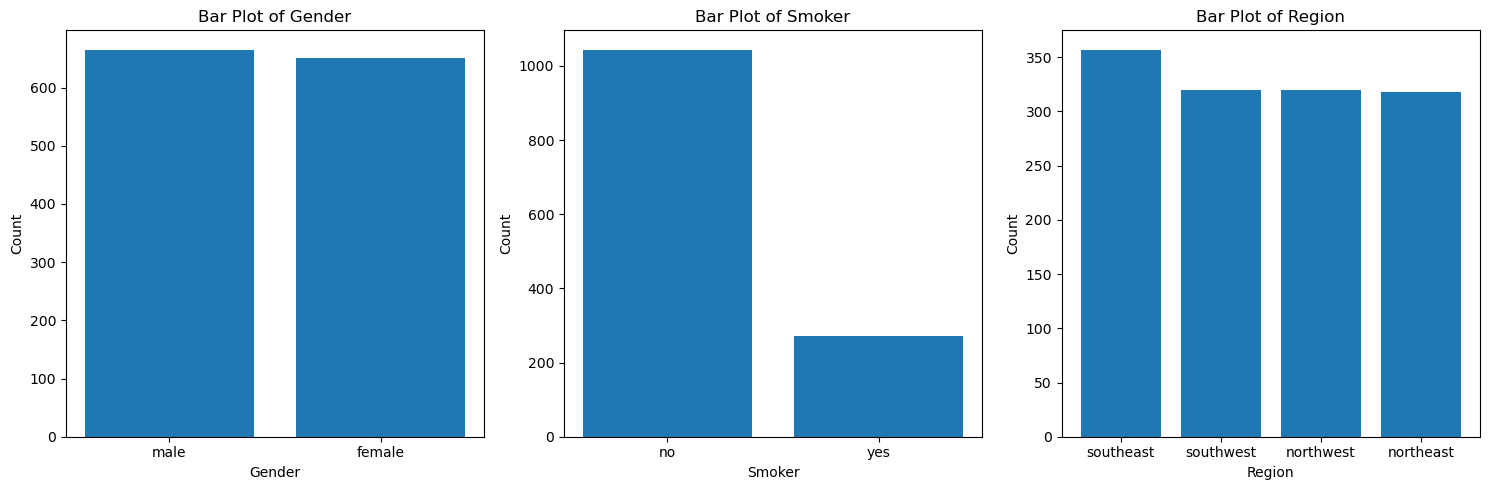

In [11]:
#Use bar charts or count plots for categorical columns.
categorical_columns = ['Gender','Smoker','Region']

#Create subplots
fig, axes  = plt.subplots(nrows=1,ncols=len(categorical_columns),figsize=(15,5))

#Generate bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    value_counts = dataframe[column].value_counts()
    
    #Bar Plot
    axes[i].bar(value_counts.index,value_counts.values)
    axes[i].set_title(f'Bar Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
#Adjust layout
plt.tight_layout()
plt.show()

In [12]:
#Descriptive Statistics and Variability Measures:

#Compute descriptive statistics (mean, median, mode, etc.) for numerical columns
print(dataframe.describe())

               Age          BMI     Children      Expenses
count  1315.000000  1315.000000  1315.000000   1315.000000
mean     39.209886    30.666768     1.132319  13319.014616
std      14.055718     6.098831     3.217978  12130.978809
min      18.000000    16.000000   -65.000000   1121.870000
25%      26.500000    26.300000     0.000000   4729.005000
50%      39.000000    30.300000     1.000000   9391.350000
75%      51.000000    34.650000     2.000000  16964.130000
max      64.000000    53.100000    70.000000  63770.430000


In [13]:
#Calculate variability measures (standard deviation, variance, etc.)
columns_for_boxplot.append('Expenses')
variance = dataframe[columns_for_boxplot].var()
stnd_dev = dataframe[columns_for_boxplot].std()
print(variance)
print(stnd_dev)

Age         1.975632e+02
BMI         3.719574e+01
Children    1.035539e+01
Expenses    1.471606e+08
dtype: float64
Age            14.055718
BMI             6.098831
Children        3.217978
Expenses    12130.978809
dtype: float64


In [14]:
#Compute Quartiles.
quartiles = dataframe[columns_for_boxplot].quantile([0.25,0.5,0.75])
print(quartiles)

       Age    BMI  Children   Expenses
0.25  26.5  26.30       0.0   4729.005
0.50  39.0  30.30       1.0   9391.350
0.75  51.0  34.65       2.0  16964.130


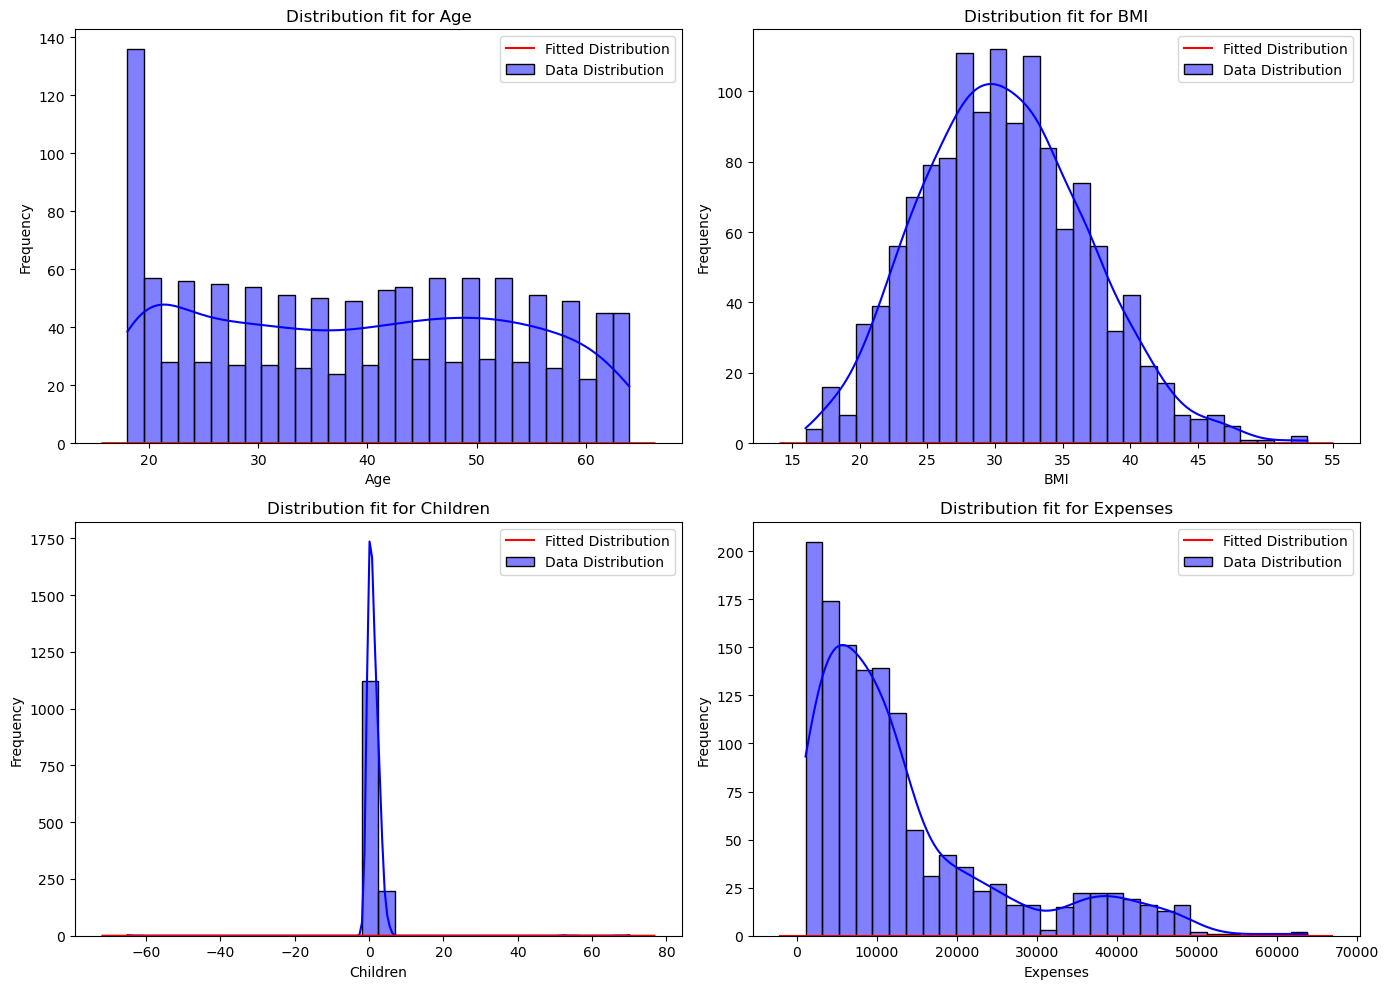

In [15]:
#Probability Distribution Modeling.
#Fit suitable probability distributions to selected columns and visualize the fits
import numpy as np
from scipy.stats import norm, gamma, lognorm
from scipy.stats import probplot
import matplotlib.gridspec as gridspec

# Assuming 'data' is your DataFrame containing the dataset
selected_columns = ['Age', 'BMI', 'Children', 'Expenses']

# Remove rows with missing or infinite values
data_cleaned = data.dropna(subset=selected_columns).replace([np.inf, -np.inf], np.nan)

# Set up subplots
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])

for i, column in enumerate(selected_columns):
    # Create a subplot
    ax = plt.subplot(gs[i])

    # Fit the distribution
    if column == 'Expenses':
        params = lognorm.fit(data_cleaned[column])
        dist = lognorm(*params)
    else:
        params = norm.fit(data_cleaned[column])
        dist = norm(*params)

    # Visualize the fit
    sns.histplot(data_cleaned[column], kde=True, bins=30, ax=ax, color='blue', label='Data Distribution')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = dist.pdf(x)
    plt.plot(x, pdf, 'r', label='Fitted Distribution')

    # Set titles and labels
    plt.title(f'Distribution fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'data' is your DataFrame containing the dataset
# Fit and transform the numerical columns
dataframe[columns_for_boxplot] = scaler.fit_transform(dataframe[columns_for_boxplot])

C:\Users\cvish\AppData\Local\Temp\ipykernel_13032\142788003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns_for_boxplot] = scaler.fit_transform(dataframe[columns_for_boxplot])


In [18]:
dataframe = pd.get_dummies(dataframe, columns=['Gender','Smoker','Region'])

In [19]:
#Linear Regression Modeling:
#Select 'Expenses' as the target variable.

from sklearn.linear_model import LinearRegression
X=dataframe.drop('Expenses',axis=1)
y=dataframe['Expenses']

#Create and train a linear regression model using the remaining columns
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
#Prediction and Model Evaluation:
#Make predictions using the model.
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
#Evaluate model performance using R-squared, MSE, or other relevant metrics
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse,r2)

0.009020779497640052 0.7608041536118314
